<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - ALS MAE</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als
from lenskit.algorithms.als import BiasedMF
from lenskit.metrics.predict import mae
import pandas as pd
import numpy as np

ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

In [ ]:
def model_trainer(features,reg):
    all_recs = []
    test_data = []
    features=int(features)
    als = BiasedMF(features=features, iterations=100, reg=reg, damping=5, bias=True,  progress=None) # define algorithm
    
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ALS', als, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)

    metric = mae(all_recs['prediction'], all_recs['rating'])
    return metric

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(params):
    features = params['features']
    reg = params['reg']
    metric = model_trainer(features,reg)
    print([features,reg,metric],',')
    return {'loss': metric, 'status': STATUS_OK}

space={'features': hp.uniform('features', 1, 100),
       'reg': hp.uniform('reg',0.01,0.4)}

best = fmin(objective, space, algo=tpe.suggest,max_evals=100)

In [ ]:
metric = pd.DataFrame(array)
metric.columns = ['features','reg','MAE']
metric.head(5)

In [7]:
metric.sort_values(by=['MAE'],ascending=True).head(10)

,features,reg,MAE
22,97.304953,0.147315,0.705833
21,86.356592,0.144310,0.705870
48,53.688314,0.202171,0.706246
84,99.804998,0.325467,0.707924
50,95.699042,0.088812,0.708094
25,85.145949,0.130355,0.708622
71,60.381219,0.115053,0.709045
74,31.430578,0.227052,0.709122
99,87.190893,0.175242,0.709458
42,63.378512,0.220192,0.709642


In [ ]:
metric.to_csv('metric_MAE.csv', index=False)

In [4]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\Alternating Least Squares\\results\\metric_MAE.csv')

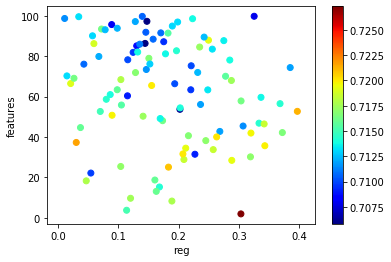

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
colormap = cm.hot
x = metric['reg']
y = metric['features'] 
c = metric['MAE']


fig = plt.figure()
img = plt.scatter(x, y, c=c, cmap=plt.jet())
plt.xlabel('reg')
plt.ylabel('features')
fig.colorbar(img)
plt.show()